In [11]:
#MRI Image Data Visualization

In [1]:
# Necessary Library Calls
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import montage 
from skimage.transform import rotate
import torch
import torchvision.transforms as transforms
from pylab import *
from torch.nn import functional as F

C:\Users\timlu\anaconda3\envs\FYP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

#All BraTS multimodal scans are available as NIfTI files (.nii.gz) and describe a) native (T1) 
#and b) post-contrast T1-weighted (T1Gd), c) T2-weighted (T2), 
#and d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes, 
#and were acquired with different clinical protocols and various scanners from multiple (n=19) institutions, 
#mentioned as data contributors here.

#All the imaging datasets have been segmented manually, by one to four raters, 
#following the same annotation protocol, and their annotations were approved by experienced neuro-radiologists. 
#Annotations comprise the GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2), 
#and the necrotic and non-enhancing tumor core (NCR/NET — label 1), as described both in the BraTS 2012-2013 
#TMI paper and in the latest BraTS summarizing paper (also see Fig.1). The provided data are distributed 
#after their pre-processing, i.e. co-registered to the same anatomical template, interpolated to the 
#same resolution (1 mm^3) and skull-stripped.


In [3]:
# Path for the dataset

In [4]:
HGG_Path = 'data/MICCAI_BraTS_2019_Data_Training/HGG/'
LGG_Path= 'data/MICCAI_BraTS_2019_Data_Training/LGG/'

In [5]:
t1_data=nib.load(LGG_Path+'BraTS19_2013_1_1/BraTS19_2013_1_1_t1.nii.gz').get_fdata()
t1ce_data=nib.load(LGG_Path+'BraTS19_2013_1_1/BraTS19_2013_1_1_t1ce.nii.gz').get_fdata()
t2_data=nib.load(LGG_Path+'BraTS19_2013_1_1/BraTS19_2013_1_1_t2.nii.gz').get_fdata()
seg_data=nib.load(LGG_Path+'BraTS19_2013_1_1/BraTS19_2013_1_1_seg.nii.gz').get_fdata()
flair_data=nib.load(LGG_Path+'BraTS19_2013_1_1/BraTS19_2013_1_1_flair.nii.gz').get_fdata()
transform = transforms.ToTensor()
t1_data=t1_data.transpose((1, 2, 0))
t1_data_tensor=transform(t1_data)
t1ce_data=t1ce_data.transpose((1, 2, 0))
t1ce_data=transform(t1ce_data)
t2_data=t2_data.transpose((1, 2, 0))
t2_data_tensor=transform(t2_data)
seg_data=seg_data.transpose((1, 2, 0))
seg_data_tensor=transform(seg_data)
flair_data=flair_data.transpose((1, 2, 0))
flair_data_tensor=transform(flair_data)



In [6]:
# how to use torch.nn.functional.one_hot

image_cat='HGG'
image_id='BraTS19_CBICA_ABB_1'
image_path='data/MICCAI_BraTS_2019_Data_Training'
seg_data=nib.load(image_path+'/'+image_cat+'/'+image_id+'/'+image_id+'_seg.nii.gz').get_fdata()
img = seg_data[:,:,:]
img = torch.from_numpy(img)
img=img.long()
oh = F.one_hot(img)
print (oh.shape)

torch.Size([240, 240, 155, 5])


tensor([0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
        1, 1, 1, 4, 4, 4])


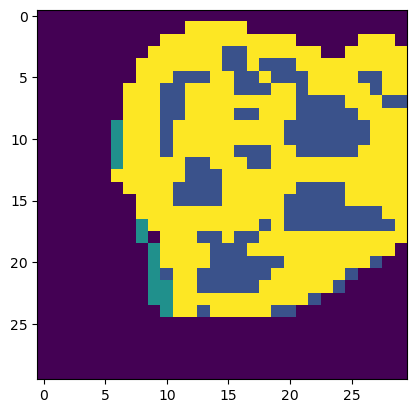

In [12]:
# testing
t=img[150:180,150:180,100]
print(t[9,:])
figure()
imshow(t)
show()

In [8]:
print(t[5,:])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4,
        4, 4, 1, 1, 4, 4])


In [8]:
# Get image info from the header
t1_hdr=nib.load(HGG_Path+'BraTS19_CBICA_AAG_1/BraTS19_CBICA_AAG_1_t1.nii.gz').header
t1ce_hdr=nib.load(HGG_Path+'BraTS19_2013_2_1/BraTS19_2013_2_1_t1ce.nii.gz').header
t2_hdr=nib.load(HGG_Path+'BraTS19_2013_2_1/BraTS19_2013_2_1_t2.nii.gz').header
seg_hdr=nib.load(HGG_Path+'BraTS19_CBICA_ABB_1/BraTS19_CBICA_ABB_1_seg.nii.gz').header
flair_hdr=nib.load(HGG_Path+'BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz').header

#print(t1_hdr)
print(t1ce_hdr)
# print(t2_hdr)



<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1.  0.  0. -0.]
srow_y          :

In [15]:
# Each image file has 155 slices with WxH as 240x240
# Print the selected slices from each type of the 5 image files 

tensor(64., dtype=torch.float64)


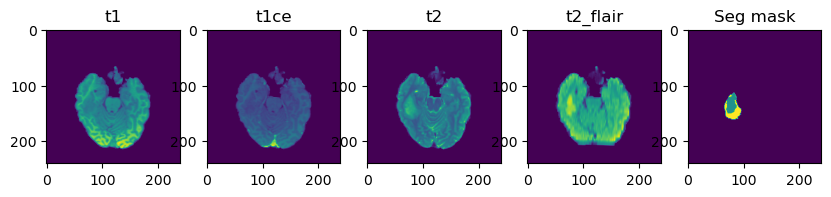

In [20]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(10,10))
ax1.imshow(t1_data_tensor[:,:,50].T)
ax1.set_title('t1')
ax2.imshow(t1ce_data[:,:,50].T)
ax2.set_title('t1ce')
ax3.imshow(t2_data_tensor[:,:,50].T)
ax3.set_title('t2')
ax4.imshow(flair_data_tensor[:,:,50].T)
ax4.set_title('t2_flair')
ax5.imshow(seg_data_tensor[:,:,50].T)
ax5.set_title('Seg mask')
print(t1_data_tensor[100,100,100])

torch.Size([2, 128, 144, 5])


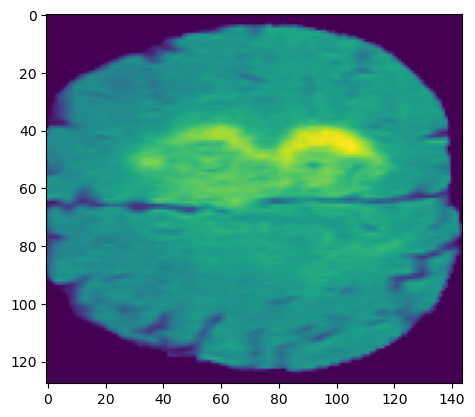

In [24]:
IMAGE_SIZE=240
w=144
h=128
SLICE_NUM=5
starts=100
img = np.zeros((2,IMAGE_SIZE,IMAGE_SIZE,155))
img=torch.tensor(img)
img[0,:,:,:]=flair_data_tensor
img[1,:,:,:]=t1_data_tensor
x=np.zeros((2,h,w,5))
x=torch.tensor(x)
x = img[:,55:55+h,55:55+w,starts+3:starts+3+SLICE_NUM]
print(x.shape)

temp = x[0,:,:,:]
figure()
imshow(temp[:,:,3])
show()


y=np.zeros((IMAGE_SIZE,IMAGE_SIZE,SLICE_NUM))
y=flair_data_tensor[55:55+h,55:55+w,starts+3:starts+3+SLICE_NUM]


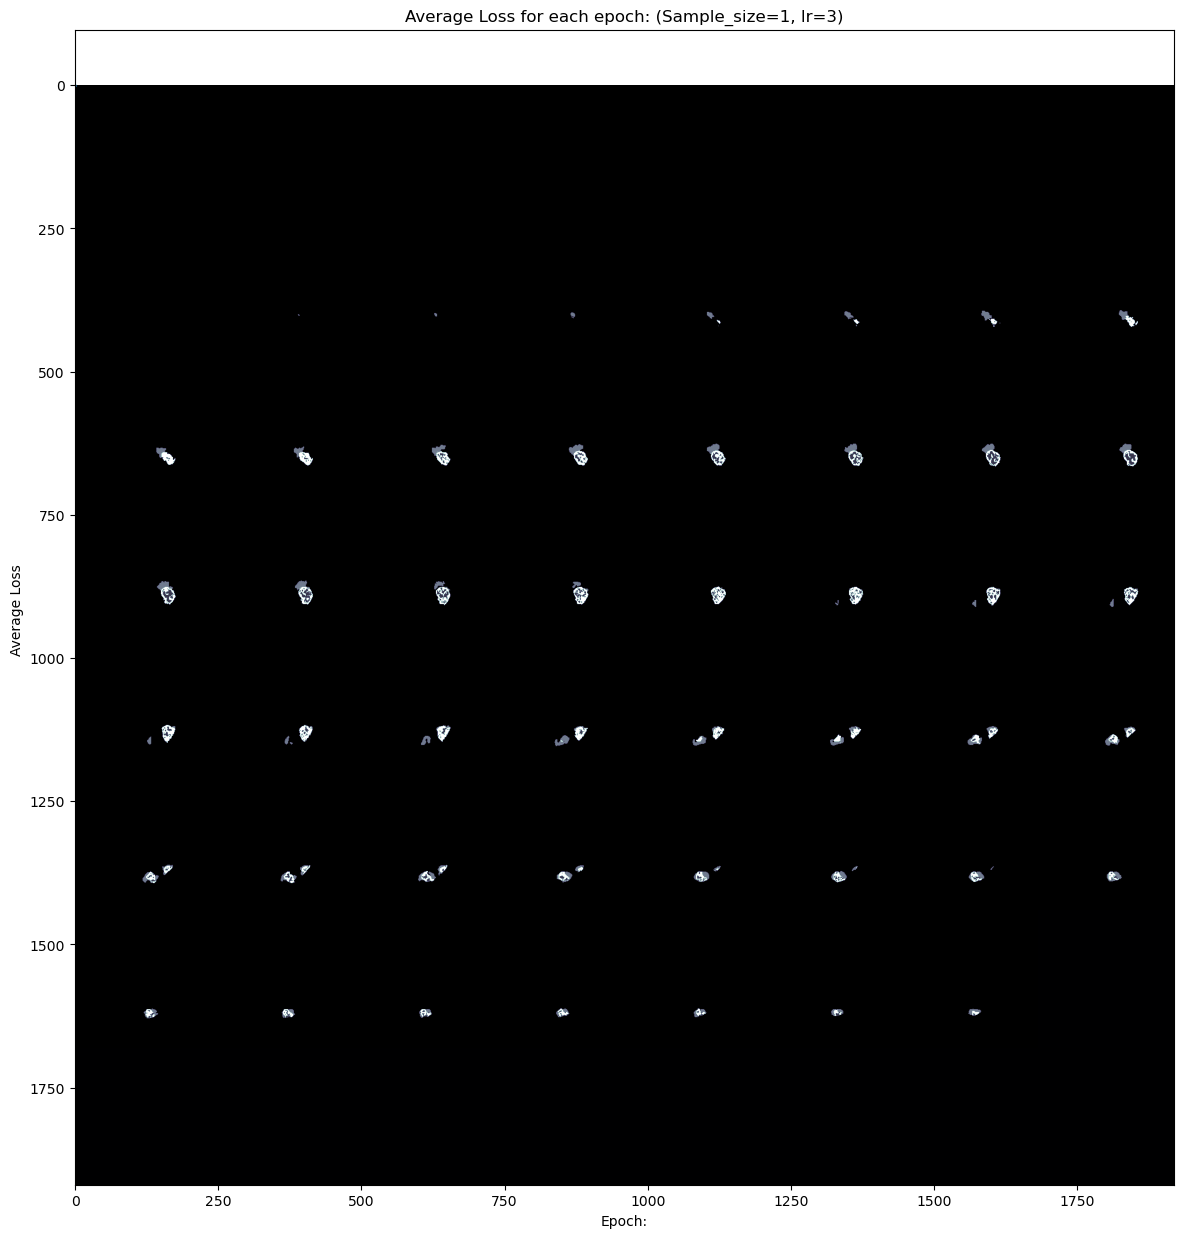

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(montage(seg_data[:,:,70:-30].T),cmap='bone')
ax1.set_title('t1 slices from 30 to 124')
plt.plot((0,1), (-1,1))
plt.title("Average Loss for each epoch: (Sample_size={}, lr={})".format(1*1 ,3))
plt.xlabel("Epoch:")
plt.ylabel("Average Loss ")
plt.savefig('Training Loss plot.png')
plt.show()

C:\Users\timlu\AppData\Local\Temp\ipykernel_3044\1349421233.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2985.)
  ax1.imshow(montage(t1ce_data[:,:,30:-30].T),cmap='bone')


Text(0.5, 1.0, 't1ce slices from 30 to 124')

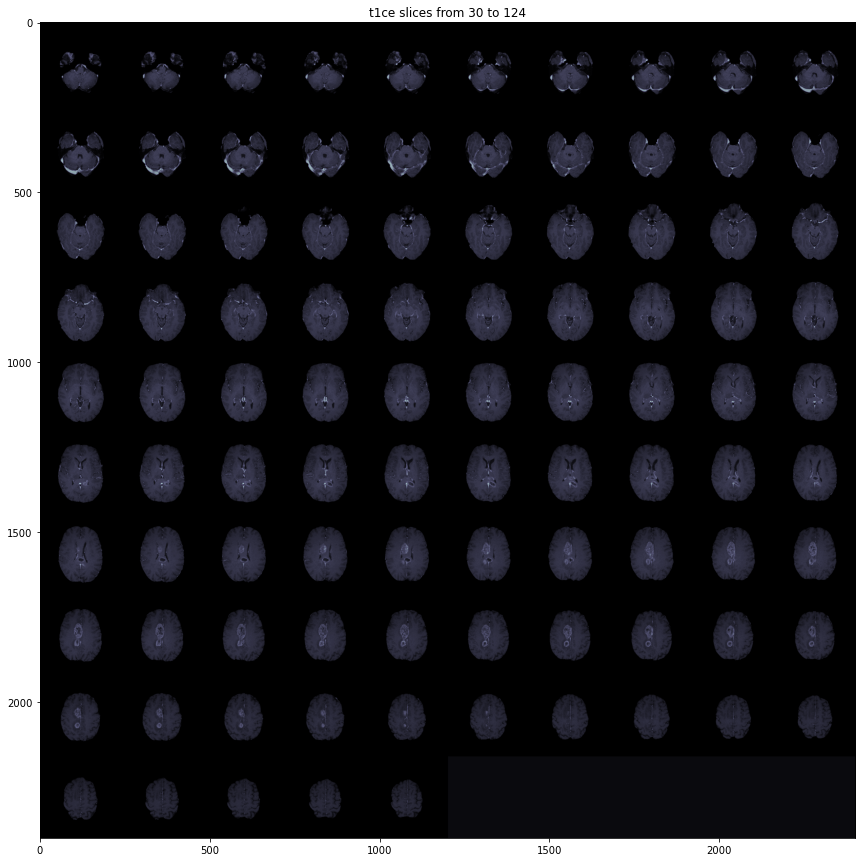

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(montage(t1ce_data[:,:,30:-30].T),cmap='bone')
ax1.set_title('t1ce slices from 30 to 124')

Text(0.5, 1.0, 't2 slices from 30 to 124')

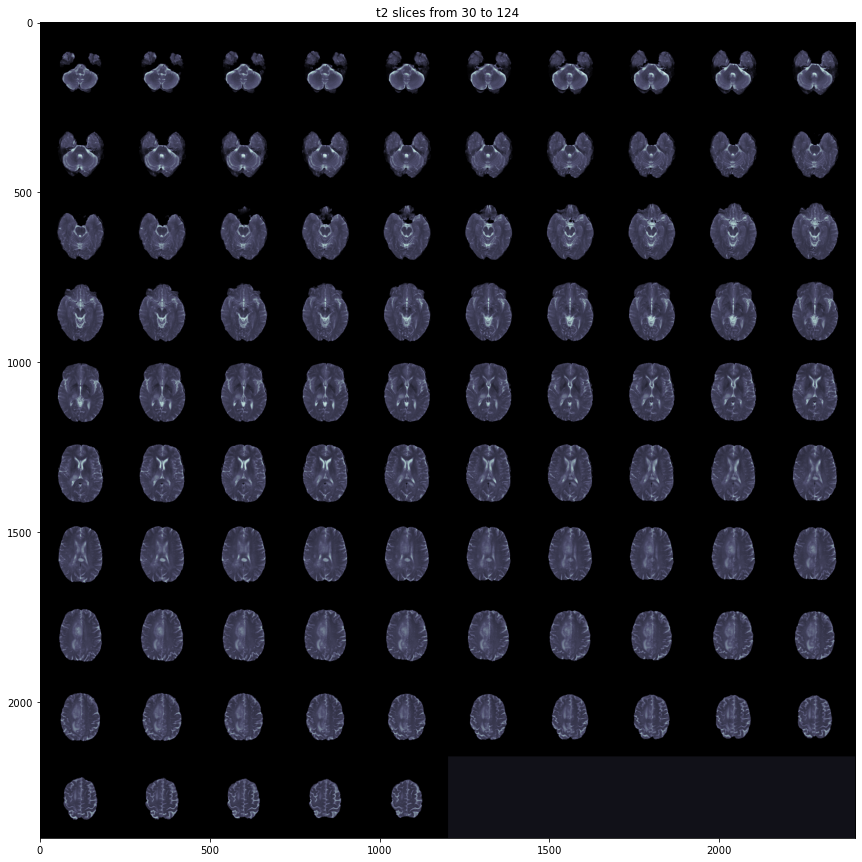

In [156]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(montage(t2_data[:,:,30:-30].T),cmap='bone')
ax1.set_title('t2 slices from 30 to 124')


Text(0.5, 1.0, 'flair slices from 30 to 124')

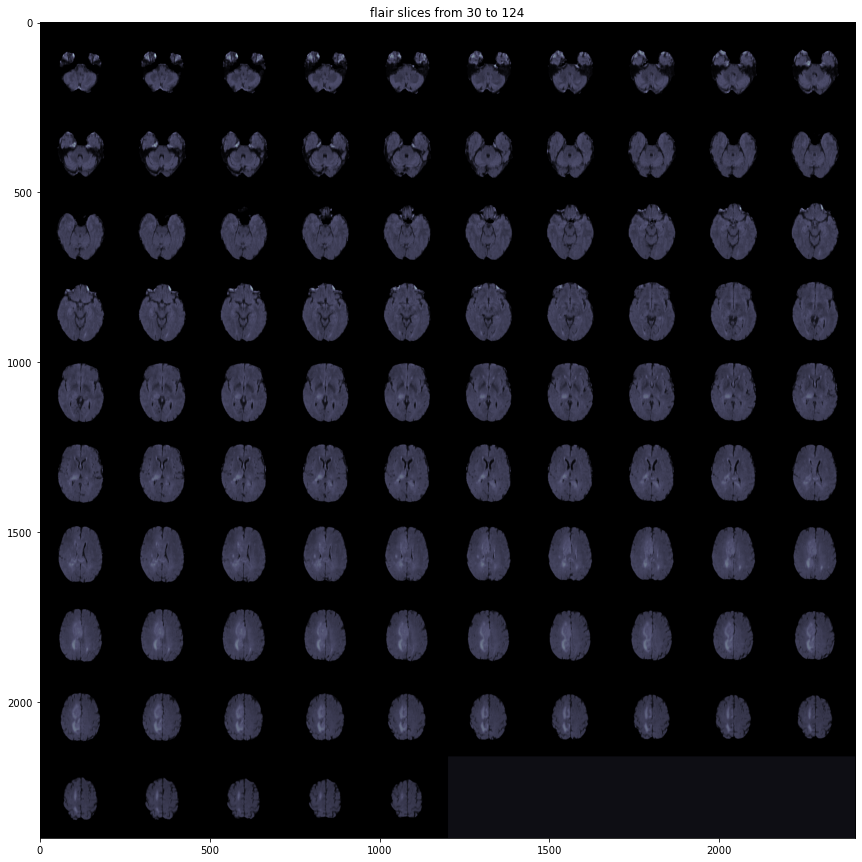

In [145]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(montage(flair_data[:,:,30:-30].T),cmap='bone')
ax1.set_title('flair slices from 30 to 124')


Text(0.5, 1.0, 'seg mask slices from 30 to 124')

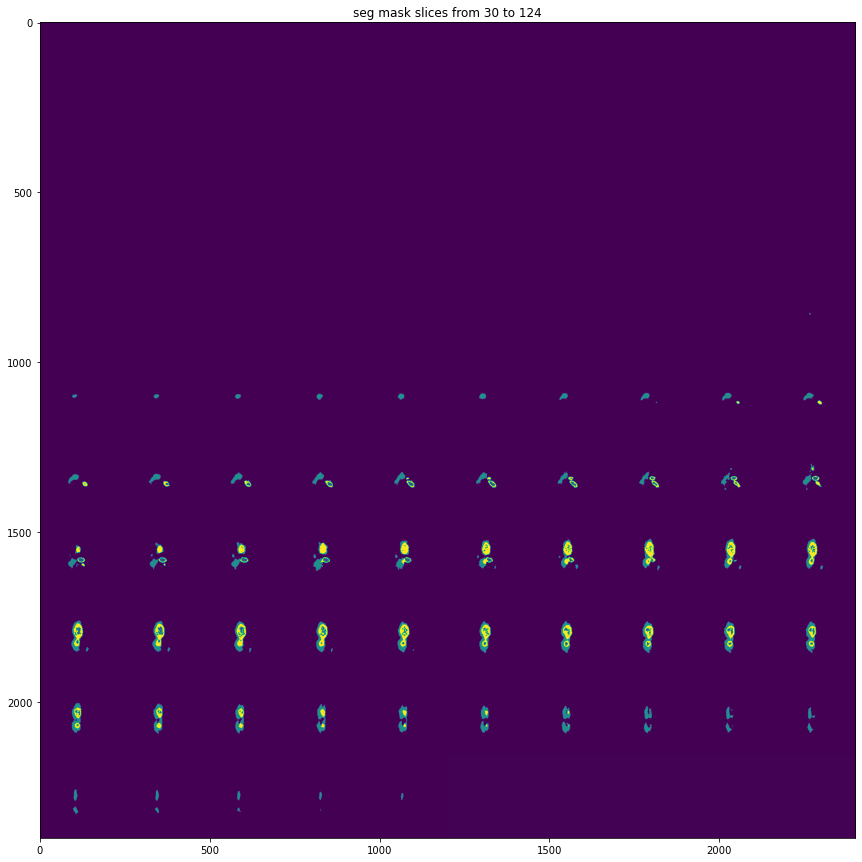

In [150]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(montage(seg_data[:,:,30:-30].T))
ax1.set_title('seg mask slices from 30 to 124')


In [3]:
def re():
    return [1,2,3,4]

In [5]:
a=re